<a href="https://colab.research.google.com/github/mostafizur1997/Machine-Learning-Project/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import library

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly

In [56]:
#Read the dataset
df= pd.read_csv('/content/mall_customers.csv')

In [57]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [58]:
df.drop('CustomerID', axis =1, inplace=True)

In [59]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [60]:
df.rename(columns ={'Annual Income (k$)':'income', 'Spending Score (1-100)':'score', 'Age':'age'}, inplace =True)

In [61]:
df.head()

,Gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


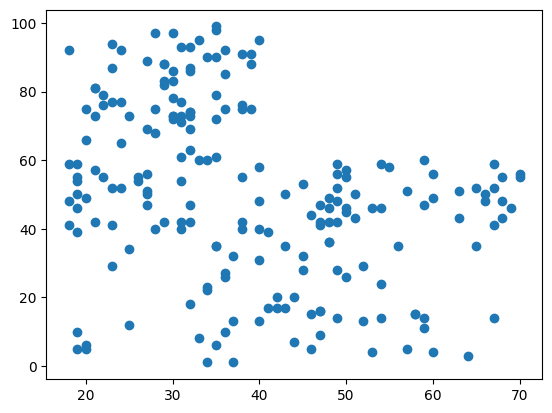

In [62]:
#Visualize
plt.scatter(df.age,df.score)

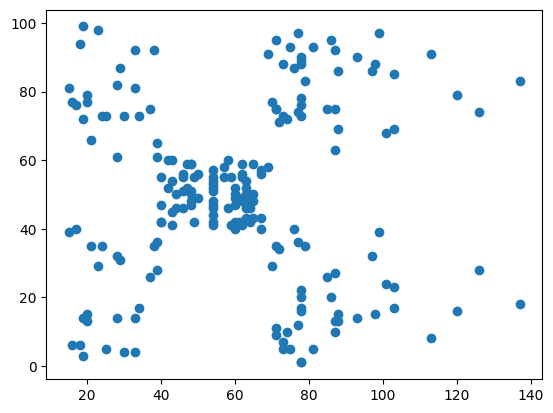

In [63]:
plt.scatter(df.income,df.score)

In [64]:
sns

<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

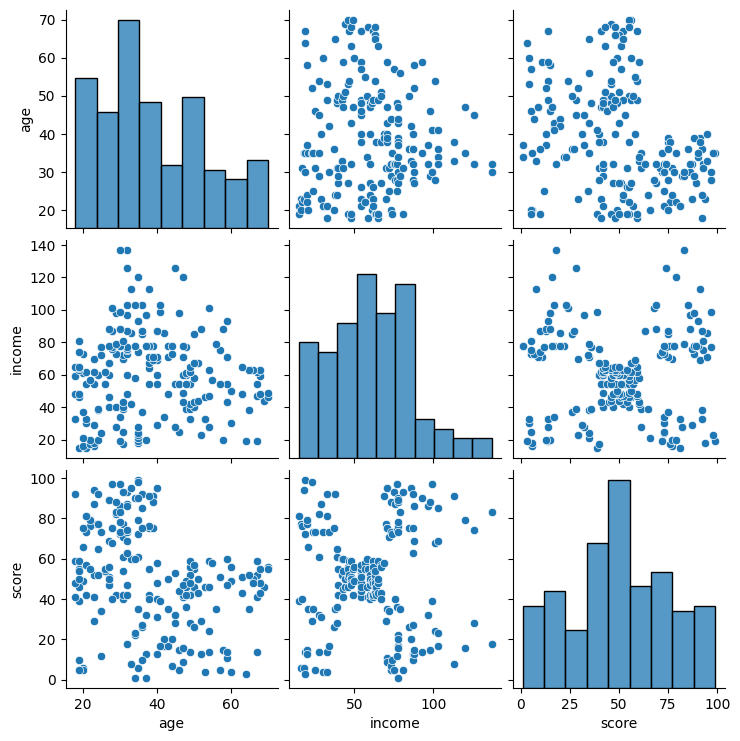

In [65]:
sns.pairplot(df[['age','income','score']])

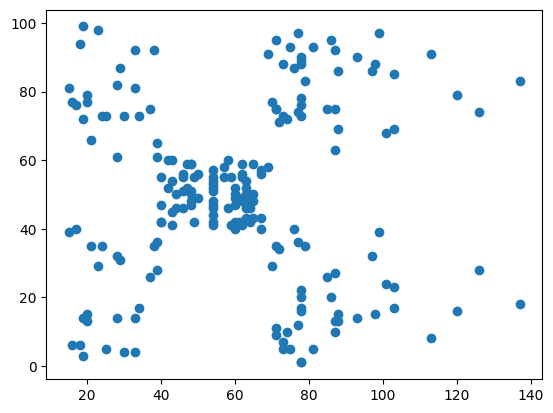

In [66]:
plt.scatter(df.income, df.score)

#KMeans clustering

In [67]:
from sklearn.cluster import KMeans
kmeans= KMeans()
kmeans.fit(df[['income', 'score']]) 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [68]:
kmeans.predict(df[['income','score']])

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2, 4, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 0, 6, 0, 1, 0, 1, 0,
       6, 0, 1, 0, 1, 0, 1, 0, 1, 0, 6, 0, 1, 0, 6, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 6, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7,
       5, 7], dtype=int32)

In [69]:
df['predicted cluster'] = kmeans.predict(df[['income', 'score']])

In [70]:
df.head()

,Gender,age,income,score,predicted cluster
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


In [71]:
df.tail()

,Gender,age,income,score,predicted cluster
195,Female,35,120,79,7
196,Female,45,126,28,5
197,Male,32,126,74,7
198,Male,32,137,18,5
199,Male,30,137,83,7


In [72]:
center1 = kmeans.cluster_centers_

In [73]:
center1

array([[ 78.55172414,  82.17241379],
       [ 80.18181818,  12.68181818],
       [ 47.72340426,  50.82978723],
       [ 25.14285714,  19.52380952],
       [ 25.0952381 ,  80.04761905],
       [109.7       ,  22.        ],
       [ 64.45      ,  46.45      ],
       [109.7       ,  82.        ]])

#Visualization

In [74]:
df0 = df[df['predicted cluster'] == 0]
df1 = df[df['predicted cluster'] == 1]
df2 = df[df['predicted cluster'] == 2]
df3 = df[df['predicted cluster'] == 3]
df4 = df[df['predicted cluster'] == 4]
df5 = df[df['predicted cluster'] == 5]
df6 = df[df['predicted cluster'] == 6]
df7 = df[df['predicted cluster'] == 7]

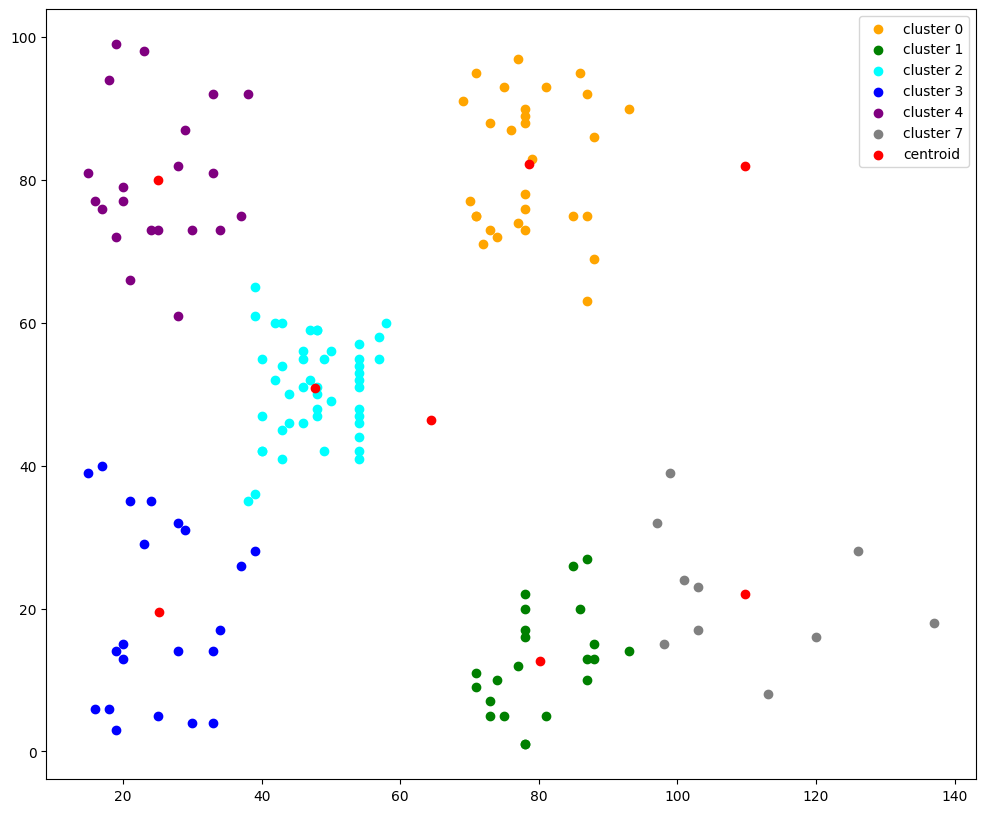

In [75]:
plt.figure(figsize=(12,10))
plt.scatter(df0['income'], df0['score'], color='orange', label='cluster 0')
plt.scatter(df1['income'], df1['score'], color='green', label='cluster 1')
plt.scatter(df2['income'], df2['score'], color='cyan', label='cluster 2')
plt.scatter(df3['income'], df3['score'], color='blue', label='cluster 3')
plt.scatter(df4['income'], df4['score'], color='purple', label='cluster 4')
plt.scatter(df5['income'], df5['score'], color='gray', label='cluster 7')

plt.scatter(center1[:,0], center1[:,1],color='red', label='centroid')
plt.legend()

#Tuning

In [76]:
from sklearn.cluster import KMeans

In [77]:
wcss =[]
clusters = range(1,16)

for k in clusters:
  kmeans= KMeans(n_clusters=k)
  kmeans.fit(df[['score', 'income']])
  wcss.append(kmeans.inertia_) #sum of the squared distances

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [78]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25095.70320999756,
 22868.175459737184,
 19634.554629349976,
 17511.7418692661,
 16370.895915244844,
 14484.798915558125,
 13186.769334655715,
 11934.306749452593]

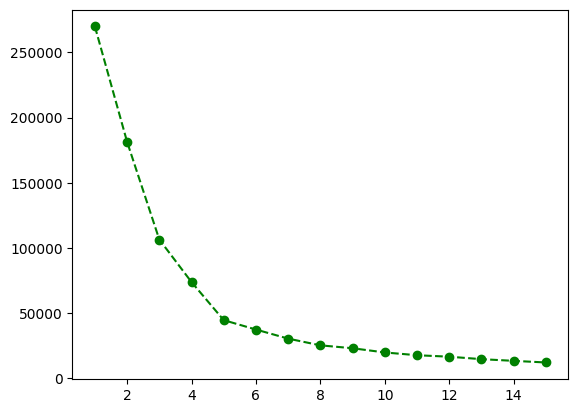

In [79]:
plt.plot(clusters, wcss, 'go--')

In [80]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
from kneed import KneeLocator

In [82]:
kn = KneeLocator(clusters, wcss, curve='convex', direction ='decreasing')

In [83]:
kn.knee

5

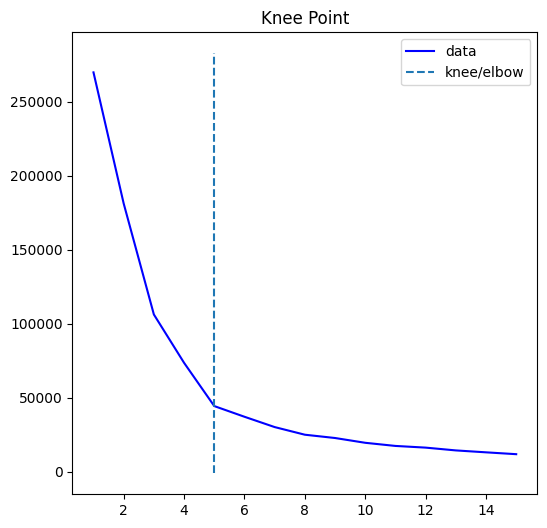

In [84]:
kn.plot_knee()

# K=5; CLUSTER = 5

In [85]:
kmean2 = KMeans(n_clusters = kn.knee)

In [86]:
kmean2

KMeans(n_clusters=5)

In [87]:
df['new clusters'] = kmean2.fit_predict(df[['income', 'score']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [88]:
df.head()

,Gender,age,income,score,predicted cluster,new clusters
0,Male,19,15,39,3,0
1,Male,21,15,81,4,3
2,Female,20,16,6,3,0
3,Female,23,16,77,4,3
4,Female,31,17,40,3,0


In [89]:
df0 = df[df['new clusters'] ==0]
df1 = df[df['new clusters'] ==1]
df2 = df[df['new clusters'] ==2]
df3 = df[df['new clusters'] ==3]
df4 = df[df['new clusters'] ==4]

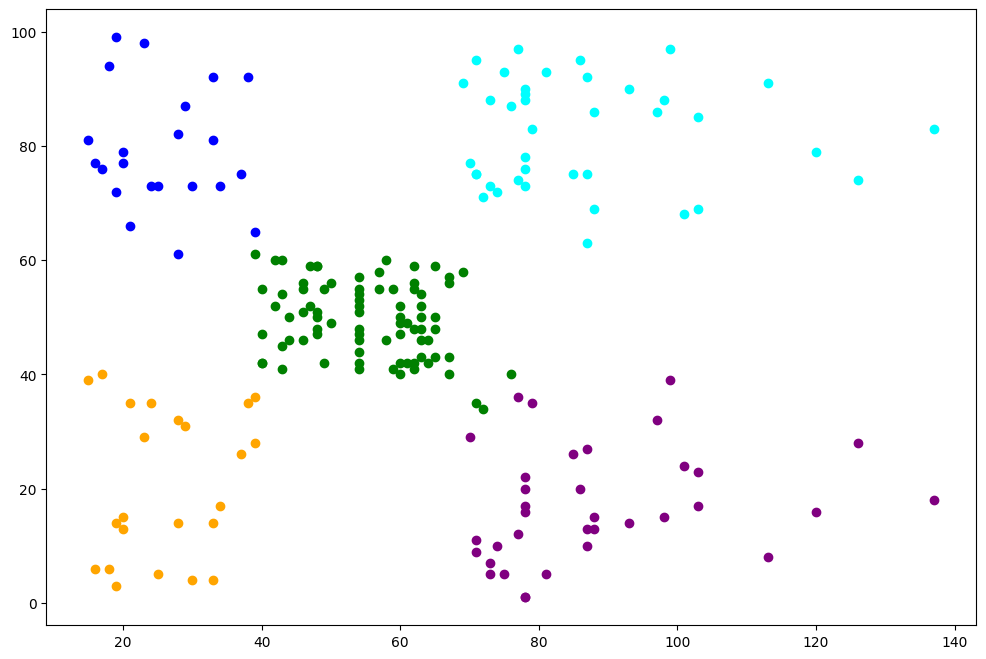

In [90]:
plt.figure(figsize=(12,8))
plt.scatter(df0['income'],df0['score'], color='orange', label='cluster 0')
plt.scatter(df1['income'],df1['score'], color='green', label='cluster 1')
plt.scatter(df2['income'],df2['score'], color='cyan', label='cluster 2')
plt.scatter(df3['income'],df3['score'], color='blue', label='cluster 3')
plt.scatter(df4['income'],df4['score'], color='purple', label='cluster 4')

In [91]:
centers= kmean2.cluster_centers_

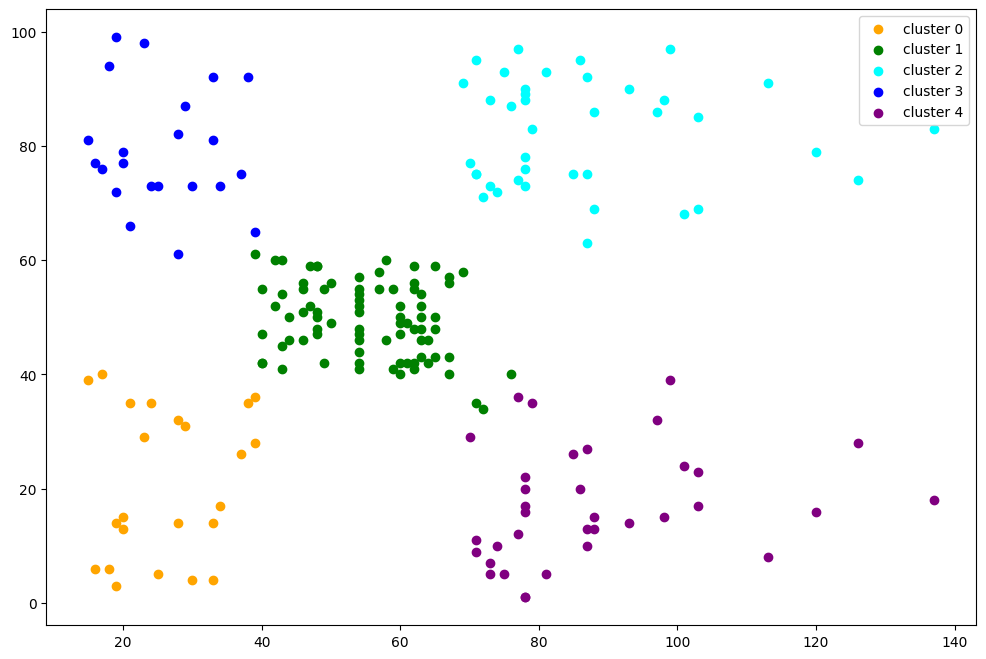

In [92]:
plt.figure(figsize=(12,8))
plt.scatter(df0['income'],df0['score'], color='orange', label='cluster 0')
plt.scatter(df1['income'],df1['score'], color='green', label='cluster 1')
plt.scatter(df2['income'],df2['score'], color='cyan', label='cluster 2')
plt.scatter(df3['income'],df3['score'], color='blue', label='cluster 3')
plt.scatter(df4['income'],df4['score'], color='purple', label='cluster 4')
plt.legend()

In [93]:
kmean2.cluster_centers_

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571]])

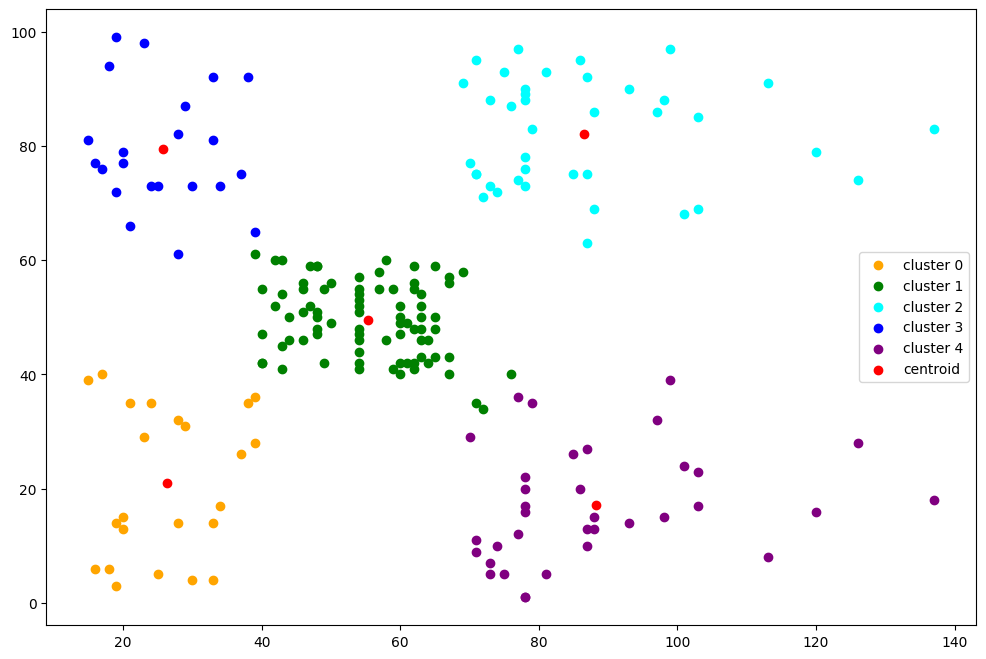

In [94]:
plt.figure(figsize=(12,8))
plt.scatter(df0['income'],df0['score'], color='orange', label='cluster 0')
plt.scatter(df1['income'],df1['score'], color='green', label='cluster 1')
plt.scatter(df2['income'],df2['score'], color='cyan', label='cluster 2')
plt.scatter(df3['income'],df3['score'], color='blue', label='cluster 3')
plt.scatter(df4['income'],df4['score'], color='purple', label='cluster 4')
plt.scatter(centers[:,0], centers[:,1], color='red', label='centroid')
plt.legend()

In [95]:
kmean2.predict([[14,20]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)